In [3]:
from __future__ import print_function

import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']


def main():
    """Shows basic usage of the Drive v3 API.
    Prints the names and ids of the first 10 files the user has access to.
    """
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    try:
        service = build('drive', 'v3', credentials=creds)

        # Call the Drive v3 API
        results = service.files().list(
            pageSize=10, fields="nextPageToken, files(id, name)").execute()
        items = results.get('files', [])

        if not items:
            print('No files found.')
            return
        print('Files:')
        for item in items:
            print(u'{0} ({1})'.format(item['name'], item['id']))
    except HttpError as error:
        # TODO(developer) - Handle errors from drive API.
        print(f'An error occurred: {error}')


if __name__ == '__main__':
    main()

Files:
Datajobs.vn (02) (13YY8fEXyflNs3t_7e4NgHaHNtiZc8MHX4hXyKYSrcBc)
Phát triển bản thân (1b7HsgBRIwaV-kKXovCX3bzBMbMk0fOmBF3df0Kwv6SU)
Khách hàng đầu tư (1OreCLhSU6UuO8K5SZp8IpqcSZUx1Yq9QJb6PafPvP7M)
Automate (1Pi8PYDE0dpbNWXajChMY7FRnpuGUjRuc)
Theo dõi trading (1MZVvZm6yjLjbNP_bA113cLp5HWOQLz1cj6jGqfaCBt4)
Results of COE Bidding Exercise (1Ma8dm_rdtdfNp8ONUG5ykFHwrEg1GFC3ObOMualMVBM)
JD - BD Researcher (1XDa7f8C8zcB46x5yTPYRw3pS4OBtLxfUP33LVDjkxTU)
Plume_Sr Data Scientist (1-LY202kwNWzVZe0SZLnzb3dHvG_idQOWPhOE4Dftdzs)
HuynhThanhQuan_SeniorDataScientist - HuynhThanhQuan_SeniorDataScientist.pdf (1kh6mx9OpVcgcrL_MDXRgLCKDWMgCrlag)
OFFLINE CẢ HAI (1jp8K6FjKchQAayYNAxdf1d21RZt60nZBrlZt9kg7rgI)


In [18]:
from __future__ import print_function

import google.auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError


def search_file():
    """Search file in drive location

    Load pre-authorized user credentials from the environment.
    TODO(developer) - See https://developers.google.com/identity
    for guides on implementing OAuth2 for the application.
    """
    # creds, _ = google.auth.default()
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)

    try:
        # create drive api client
        service = build('drive', 'v3', credentials=creds)
        files = []
        page_token = None
        while True:
            # pylint: disable=maybe-no-member
            response = service.files().list(q="name = 'Khách hàng đầu tư'",
                                            spaces='drive',
                                            fields='nextPageToken, '
                                                   'files(id, name)',
                                            pageToken=page_token).execute()
            for file in response.get('files', []):
                # Process change
                print(F'Found file: {file.get("name")}, {file.get("id")}')
            files.extend(response.get('files', []))
            page_token = response.get('nextPageToken', None)
            if page_token is None:
                break

    except HttpError as error:
        print(F'An error occurred: {error}')
        files = None

    return files


if __name__ == '__main__':
    files = search_file()

Found file: Khách hàng đầu tư, 1OreCLhSU6UuO8K5SZp8IpqcSZUx1Yq9QJb6PafPvP7M


In [19]:
files

[{'id': '1OreCLhSU6UuO8K5SZp8IpqcSZUx1Yq9QJb6PafPvP7M',
  'name': 'Khách hàng đầu tư'}]

In [54]:
from __future__ import print_function

import io

import google.auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseDownload


def download_file(real_file_id):
    """Downloads a file
    Args:
        real_file_id: ID of the file to download
    Returns : IO object with location.

    Load pre-authorized user credentials from the environment.
    TODO(developer) - See https://developers.google.com/identity
    for guides on implementing OAuth2 for the application.
    """
    SCOPES = ['https://www.googleapis.com/auth/drive.readonly']
    
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    try:
        # create drive api client
        service = build('drive', 'v3', credentials=creds)

        file_id = real_file_id

        # pylint: disable=maybe-no-member
        request = service.files().export_media(fileId=file_id, mimeType='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')
        file = io.FileIO('data.xls', 'wb')
        downloader = MediaIoBaseDownload(file, request)
        done = False
        while done is False:
            status, done = downloader.next_chunk()
            print(F'Download {int(status.progress() * 100)}.')

    except HttpError as error:
        print(F'An error occurred: {error}')
        file = None

    return file


if __name__ == '__main__':
    file=download_file(real_file_id='1OreCLhSU6UuO8K5SZp8IpqcSZUx1Yq9QJb6PafPvP7M')

Download 100.


In [55]:
import pandas as pd
df = pd.read_excel('data.xls', sheet_name='Hoạt động giao dịch')
df

,Chủ tài khoản,Thời gian giao dịch,Mã Đầu tư,KL giao dịch,Giá mua,TS khớp lệnh mua,Giá bán,TS khớp lệnh bán
0,Lê Thị Ánh Ngọc,2023-02-20 10:25:00,PC1,300,27408.0,8222400.0,NaN,NaN
1,Lê Thị Ánh Ngọc,2023-04-10 09:39:00,PC1,300,NaN,NaN,28250.0,8475000.0
2,Lê Thị Ánh Ngọc,2023-04-17 16:10:00,BID,200,44513.0,8902600.0,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Chủ tài khoản        3 non-null      object        
 1   Thời gian giao dịch  3 non-null      datetime64[ns]
 2   Mã Đầu tư            3 non-null      object        
 3   KL giao dịch         3 non-null      int64         
 4   Giá mua              2 non-null      float64       
 5   TS khớp lệnh mua     2 non-null      float64       
 6   Giá bán              1 non-null      float64       
 7   TS khớp lệnh bán     1 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 320.0+ bytes


In [62]:
df1 = df.sort_values('Thời gian giao dịch')
df1

,Chủ tài khoản,Thời gian giao dịch,Mã Đầu tư,KL giao dịch,Giá mua,TS khớp lệnh mua,Giá bán,TS khớp lệnh bán
0,Lê Thị Ánh Ngọc,2023-02-20 10:25:00,PC1,300,27408.0,8222400.0,NaN,NaN
1,Lê Thị Ánh Ngọc,2023-04-10 09:39:00,PC1,300,NaN,NaN,28250.0,8475000.0
2,Lê Thị Ánh Ngọc,2023-04-17 16:10:00,BID,200,44513.0,8902600.0,NaN,NaN


In [57]:
import vnstock as vns

In [63]:
vns.ticker_overview('PC1')

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,deltaInWeek,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker
0,HOSE,Tập đoàn PC1,181,2357,Xây dựng và Vật liệu,Construction & Materials,2005,1524,686,0.084,http://pc1group.vn,3.6,0.014,0.028,0.09,270.4,270.4,CT,PC1


In [67]:
df_stock = vns.stock_historical_data(symbol='PC1', start_date="2023-02-20", end_date='2023-04-10')
df_stock.head()

,Open,High,Low,Close,Volume,TradingDate
0,28000.0,28400.0,27400.0,27400.0,2943088,2023-02-21
1,26900.0,27950.0,26800.0,26900.0,3273767,2023-02-22
2,27000.0,27100.0,25900.0,27000.0,2308020,2023-02-23
3,27000.0,27850.0,27000.0,27300.0,1987800,2023-02-24
4,26850.0,27250.0,26200.0,26200.0,1832961,2023-02-27


In [69]:
df_stock['customer_value'] = df_stock['Close'] * 300
df_stock.head()

,Open,High,Low,Close,Volume,TradingDate,customer_value
0,28000.0,28400.0,27400.0,27400.0,2943088,2023-02-21,8220000.0
1,26900.0,27950.0,26800.0,26900.0,3273767,2023-02-22,8070000.0
2,27000.0,27100.0,25900.0,27000.0,2308020,2023-02-23,8100000.0
3,27000.0,27850.0,27000.0,27300.0,1987800,2023-02-24,8190000.0
4,26850.0,27250.0,26200.0,26200.0,1832961,2023-02-27,7860000.0


In [70]:
import matplotlib.pyplot as plt

<Axes: >

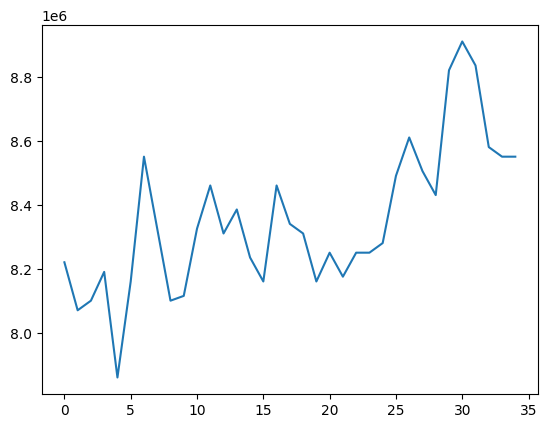

In [71]:
df_stock['customer_value'].plot()